<a href="https://colab.research.google.com/github/AdaTuanaDonmez/AdaTuanaDonmez/blob/main/_wStock2_Crypto_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving bitcoin_prices.csv to bitcoin_prices.csv


In [ ]:
import pandas as pd

file_path = 'bitcoin_prices.csv' # Change 'your-data.csv' to your file name
dataframe = pd.read_csv(file_path)

print(dataframe.head())  # Display the first few rows of the DataFrame


   Unnamed: 0        Date   Value
0           0  2016-01-01  432.33
1           1  2016-01-02  433.94
2           2  2016-01-03  428.13
3           3  2016-01-04  433.00
4           4  2016-01-05  431.90


In [ ]:
del dataframe["Unnamed: 0"]


#OR:

"""
dataframe = dataframe.drop("Unnamed: 0", axis = 1) # axis=0 is for row

dataframe

"""
dataframe

,Date,Value
0,2016-01-01,432.33
1,2016-01-02,433.94
2,2016-01-03,428.13
3,2016-01-04,433.00
4,2016-01-05,431.90
...,...,...
1884,2021-02-27,46340.31
1885,2021-02-28,46155.87
1886,2021-03-01,45113.92
1887,2021-03-02,49618.43


In [ ]:
dataframe.rename(columns = {
    "Date": "ds",
    "Value":"y"
}, inplace = True)   #modify without turning a new dataframe

dataframe

,ds,y
0,2016-01-01,432.33
1,2016-01-02,433.94
2,2016-01-03,428.13
3,2016-01-04,433.00
4,2016-01-05,431.90
...,...,...
1884,2021-02-27,46340.31
1885,2021-02-28,46155.87
1886,2021-03-01,45113.92
1887,2021-03-02,49618.43


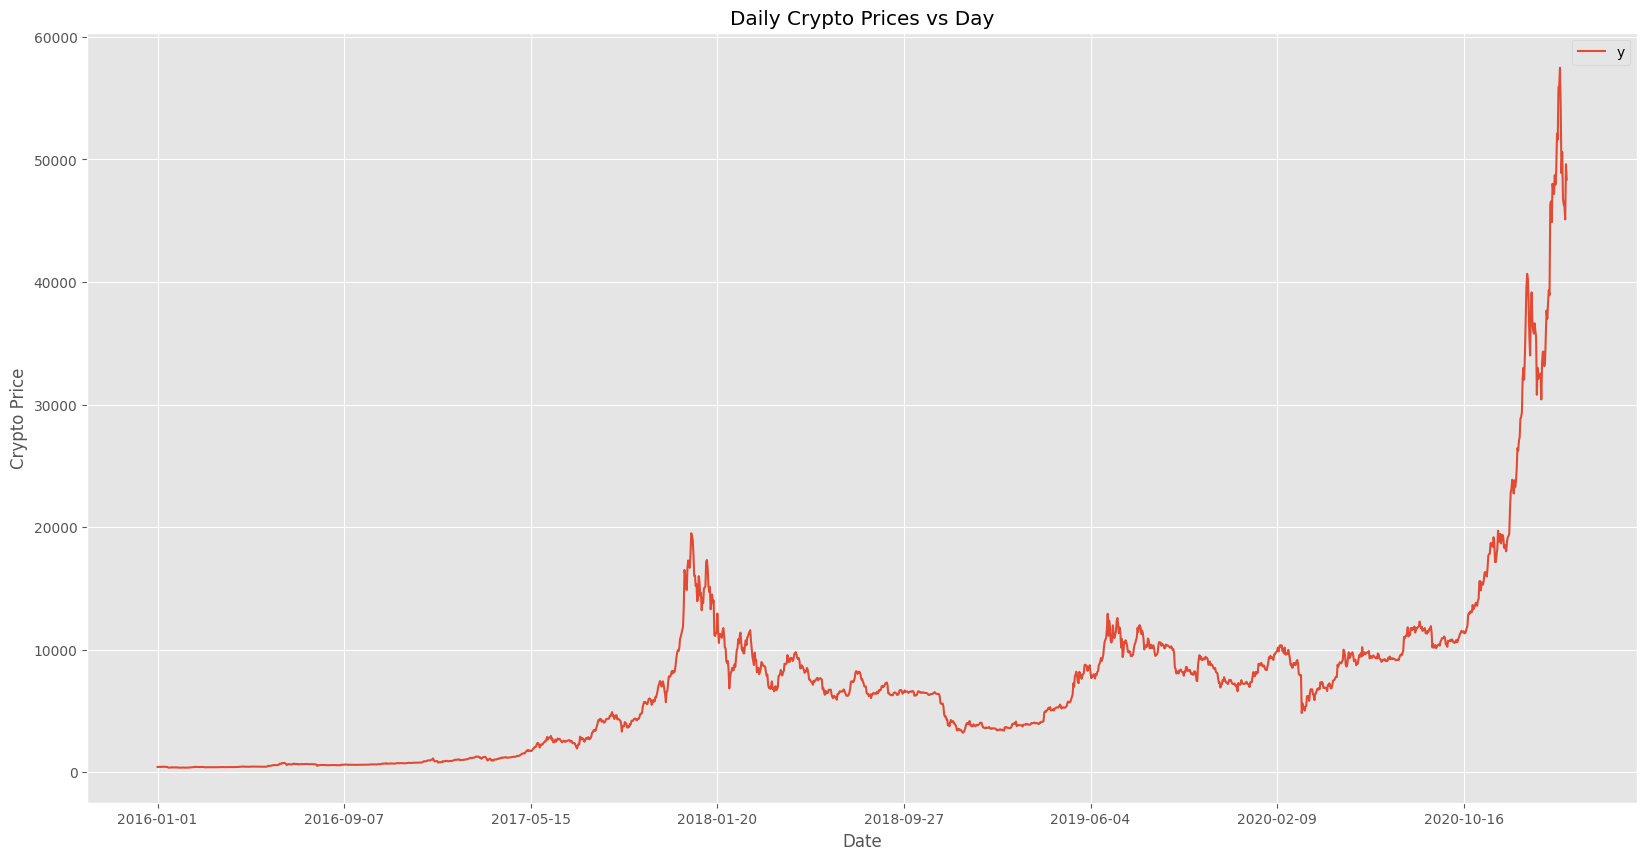

In [ ]:
import matplotlib.pyplot as pyplot

pyplot.style.use("ggplot")    #adds grids

graph = dataframe.set_index("ds").plot(figsize = (20, 10))

graph.set_title("Daily Crypto Prices vs Day")

graph.set_xlabel("Date")
graph.set_ylabel("Crypto Price")

pyplot.show()

In [ ]:
#create PREDICTIONS

from prophet import Prophet



In [ ]:
Prophet

prophet.forecaster.Prophet

In [ ]:
INTERVAL_WIDTH = 0.9

model = Prophet(interval_width = INTERVAL_WIDTH,
                daily_seasonality= True)

model.fit(dataframe)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqoq5dgm/4e_o3d5d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqoq5dgm/kvkn3_9m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72669', 'data', 'file=/tmp/tmpzqoq5dgm/4e_o3d5d.json', 'init=/tmp/tmpzqoq5dgm/kvkn3_9m.json', 'output', 'file=/tmp/tmpzqoq5dgm/prophet_model64bdzhft/prophet_model-20240427104318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:43:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:43:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
NUMBER_OF_PERIODS = 90   #extend 100 periods beyond the last date

future_dataframe = model.make_future_dataframe(periods = NUMBER_OF_PERIODS,
                                               freq = "D")       #frequency is Daily

future_dataframe

,ds
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
...,...
1974,2021-05-28
1975,2021-05-29
1976,2021-05-30
1977,2021-05-31


In [ ]:
prediction = model.predict(future_dataframe)

prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,-539.545411,-5349.212581,2387.670272,-539.545411,-539.545411,-924.852271,-924.852271,-924.852271,-3899.65449,...,-24.994001,-24.994001,-24.994001,2999.796221,2999.796221,2999.796221,0.0,0.0,0.0,-1464.397682
1,2016-01-02,-506.274617,-5289.168239,2732.335556,-506.274617,-506.274617,-685.590126,-685.590126,-685.590126,-3899.65449,...,20.232269,20.232269,20.232269,3193.832096,3193.832096,3193.832096,0.0,0.0,0.0,-1191.864743
2,2016-01-03,-473.003823,-5008.495882,3403.257794,-473.003823,-473.003823,-505.519355,-505.519355,-505.519355,-3899.65449,...,15.066604,15.066604,15.066604,3379.068532,3379.068532,3379.068532,0.0,0.0,0.0,-978.523177
3,2016-01-04,-439.733028,-4669.146448,3262.639576,-439.733028,-439.733028,-357.795373,-357.795373,-357.795373,-3899.65449,...,-11.042429,-11.042429,-11.042429,3552.901546,3552.901546,3552.901546,0.0,0.0,0.0,-797.528401
4,2016-01-05,-406.462234,-4792.531997,3873.849455,-406.462234,-406.462234,-163.481462,-163.481462,-163.481462,-3899.65449,...,23.316529,23.316529,23.316529,3712.856500,3712.856500,3712.856500,0.0,0.0,0.0,-569.943695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,2021-05-28,41764.391570,32515.410611,42946.812335,38044.424263,44883.930552,-3973.113776,-3973.113776,-3973.113776,-3899.65449,...,-24.994001,-24.994001,-24.994001,-48.465285,-48.465285,-48.465285,0.0,0.0,0.0,37791.277793
1975,2021-05-29,41842.930483,32264.309327,43057.521112,38049.464969,45032.807330,-3970.365140,-3970.365140,-3970.365140,-3899.65449,...,20.232269,20.232269,20.232269,-90.942919,-90.942919,-90.942919,0.0,0.0,0.0,37872.565343
1976,2021-05-30,41921.469396,32260.875746,43184.077020,38099.917701,45181.684107,-4014.023063,-4014.023063,-4014.023063,-3899.65449,...,15.066604,15.066604,15.066604,-129.435177,-129.435177,-129.435177,0.0,0.0,0.0,37907.446332
1977,2021-05-31,42000.008309,32738.150367,42921.039405,38148.140967,45330.560884,-4074.807157,-4074.807157,-4074.807157,-3899.65449,...,-11.042429,-11.042429,-11.042429,-164.110238,-164.110238,-164.110238,0.0,0.0,0.0,37925.201152


In [ ]:
prediction_100_days = prediction[["yhat"]].iloc[[-1]] #gets the last value

prediction_100_days

,yhat
1978,38006.957347


In [ ]:
from prophet.diagnostics import cross_validation

dataframe_cross_validation = cross_validation(model,
                 initial = "900 days",
                 period = "45 days",
                 horizon = "90 days")

#period should be half of horizon

dataframe_cross_validation


INFO:prophet:Making 20 forecasts with cutoffs between 2018-08-01 00:00:00 and 2020-12-03 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqoq5dgm/n9nzex_r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqoq5dgm/y2oxofaq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32955', 'data', 'file=/tmp/tmpzqoq5dgm/n9nzex_r.json', 'init=/tmp/tmpzqoq5dgm/y2oxofaq.json', 'output', 'file=/tmp/tmpzqoq5dgm/prophet_model61gxukwj/prophet_model-20240427104320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:43:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:43:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqoq5dgm/l5jma3uy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqoq5dgm/nftf5c7f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-02,6354.445729,4846.821561,7741.996191,7593.149167,2018-08-01
1,2018-08-03,6317.830861,4900.029074,7732.751613,7394.499167,2018-08-01
2,2018-08-04,6318.615335,4842.550710,7777.377412,7247.769167,2018-08-01
3,2018-08-05,6269.946280,4789.207891,7561.255365,6998.718333,2018-08-01
4,2018-08-06,6243.285295,4829.408035,7679.808930,6988.079167,2018-08-01
...,...,...,...,...,...,...
1795,2021-02-27,14771.363758,12288.577363,17452.634467,46340.310000,2020-12-03
1796,2021-02-28,14746.469348,12345.963883,17314.131315,46155.870000,2020-12-03
1797,2021-03-01,14714.705038,12060.773073,17482.347538,45113.920000,2020-12-03
1798,2021-03-02,14714.644407,12285.479040,17278.614045,49618.430000,2020-12-03


In [ ]:
from prophet.diagnostics import performance_metrics

performance_dataframe = performance_metrics(dataframe_cross_validation)

performance_dataframe

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,4.111330e+06,2027.641499,1605.517307,0.233153,0.143754,0.224492,0.633333
1,10 days,4.327602e+06,2080.288896,1669.859296,0.239745,0.150809,0.233343,0.600000
2,11 days,4.648117e+06,2155.949322,1753.693843,0.248494,0.163747,0.244214,0.561111
3,12 days,4.943928e+06,2223.494628,1834.228607,0.256445,0.177886,0.254615,0.522222
4,13 days,5.241681e+06,2289.471877,1912.126091,0.264474,0.179969,0.264931,0.488889
...,...,...,...,...,...,...,...,...
77,86 days,1.258603e+08,11218.745774,6940.547387,0.591388,0.506509,0.638561,0.211111
78,87 days,1.253124e+08,11194.301175,6961.306295,0.597354,0.506509,0.641206,0.205556
79,88 days,1.226586e+08,11075.132174,6948.329281,0.602105,0.506509,0.642862,0.200000
80,89 days,1.201856e+08,10962.920255,6933.826223,0.607276,0.509157,0.644785,0.200000


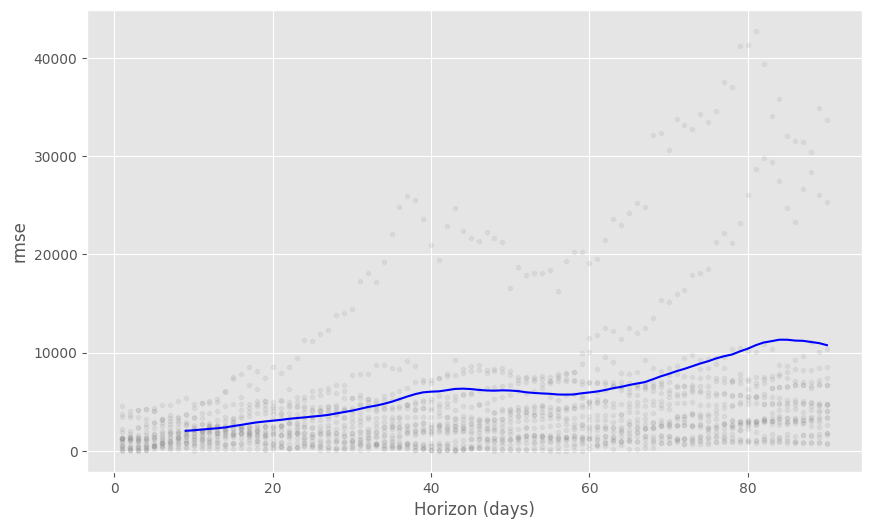

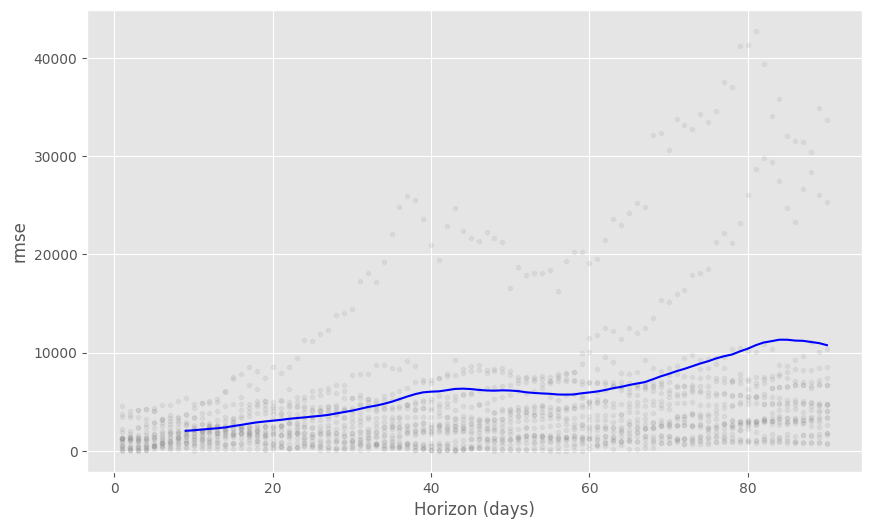

In [ ]:
from prophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(dataframe_cross_validation,
                             metric = "rmse")    #root mean square error

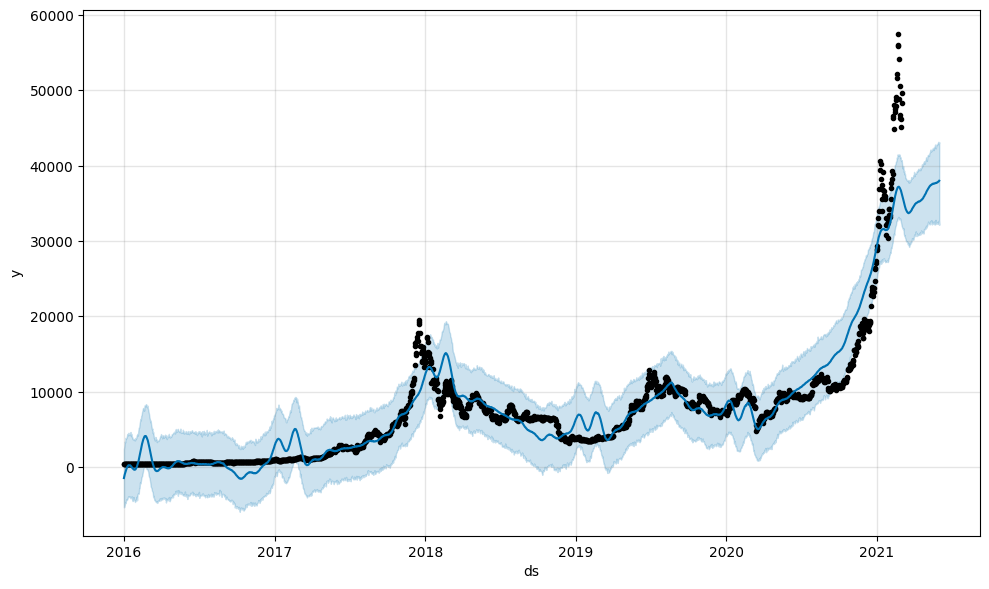

In [ ]:
pyplot.style.use("default")

model.plot(prediction)

pyplot.show()

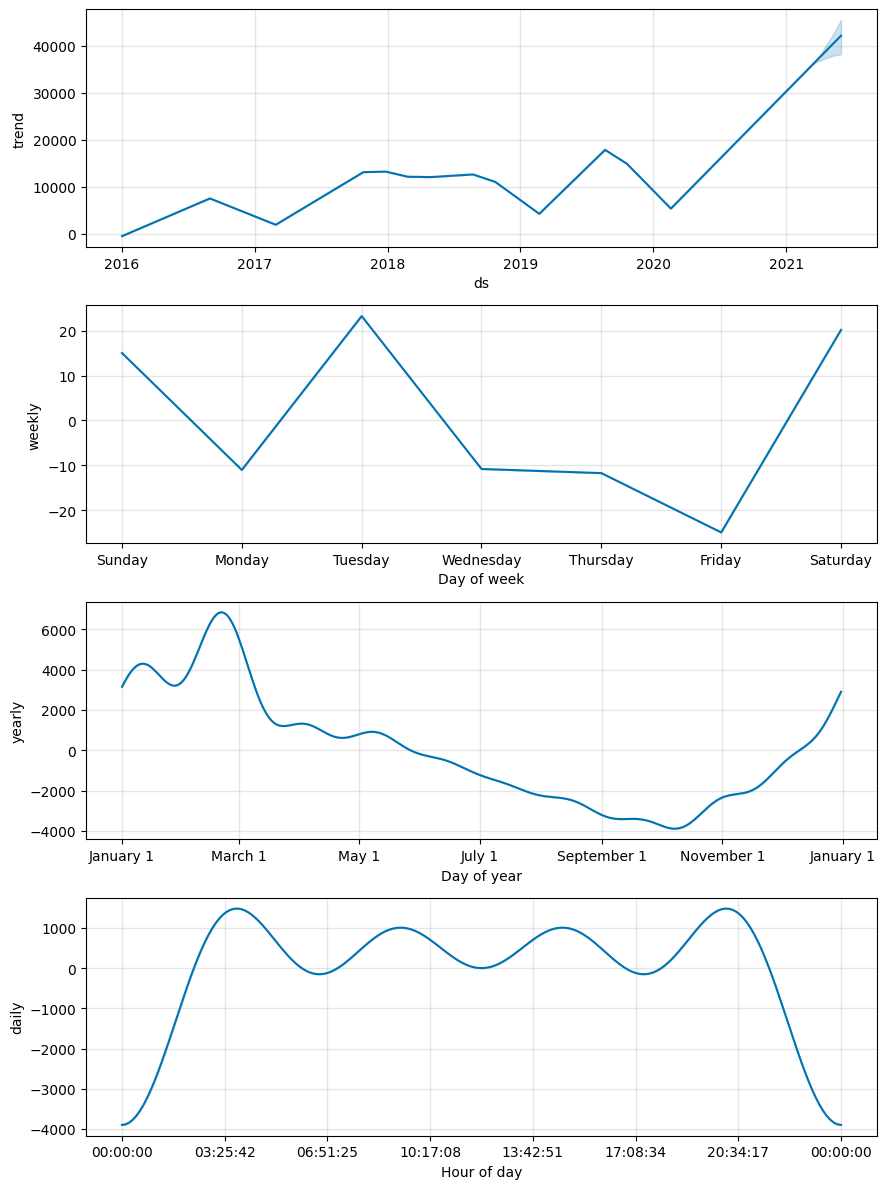

In [ ]:
#IMPORTANT !!!

model.plot_components(prediction)

pyplot.show()

In [ ]:
#PREDICT MONTHLY TREND

monthly_model = Prophet(interval_width = INTERVAL_WIDTH)

monthly_model.fit(dataframe)

NUMBER_OF_PERIODS = 3  # 3 months

future_monthly_dataframe = monthly_model.make_future_dataframe(periods = NUMBER_OF_PERIODS,
                                                               freq = "M" )

future_monthly_dataframe

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqoq5dgm/alyy8ade.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqoq5dgm/8v33keez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2036', 'data', 'file=/tmp/tmpzqoq5dgm/alyy8ade.json', 'init=/tmp/tmpzqoq5dgm/8v33keez.json', 'output', 'file=/tmp/tmpzqoq5dgm/prophet_modelj32ryw58/prophet_model-20240427104341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:43:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:43:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
...,...
1887,2021-03-02
1888,2021-03-03
1889,2021-03-31
1890,2021-04-30


In [ ]:
monthly_predictions = monthly_model.predict(future_monthly_dataframe)

monthly_predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,-3907.012936,-5536.707486,3284.729073,-3907.012936,-3907.012936,2767.866329,2767.866329,2767.866329,-26.465467,-26.465467,-26.465467,2794.331797,2794.331797,2794.331797,0.0,0.0,0.0,-1139.146607
1,2016-01-02,-3875.881494,-4973.004762,3532.352750,-3875.881494,-3875.881494,2997.999956,2997.999956,2997.999956,19.335853,19.335853,19.335853,2978.664104,2978.664104,2978.664104,0.0,0.0,0.0,-877.881538
2,2016-01-03,-3844.750052,-4867.320406,3731.886719,-3844.750052,-3844.750052,3169.378293,3169.378293,3169.378293,14.822599,14.822599,14.822599,3154.555694,3154.555694,3154.555694,0.0,0.0,0.0,-675.371759
3,2016-01-04,-3813.618610,-4886.075846,4069.452535,-3813.618610,-3813.618610,3308.767587,3308.767587,3308.767587,-10.637109,-10.637109,-10.637109,3319.404696,3319.404696,3319.404696,0.0,0.0,0.0,-504.851022
4,2016-01-05,-3782.487168,-4761.411242,3970.454595,-3782.487168,-3782.487168,3495.189905,3495.189905,3495.189905,24.457451,24.457451,24.457451,3470.732453,3470.732453,3470.732453,0.0,0.0,0.0,-287.297263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,2021-03-02,30748.622497,31018.905220,39784.366870,30748.622497,30748.622497,4753.061660,4753.061660,4753.061660,24.457451,24.457451,24.457451,4728.604208,4728.604208,4728.604208,0.0,0.0,0.0,35501.684157
1888,2021-03-03,30825.327788,30832.660421,39502.370485,30825.327788,30825.327788,4424.183528,4424.183528,4424.183528,-9.010408,-9.010408,-9.010408,4433.193936,4433.193936,4433.193936,0.0,0.0,0.0,35249.511316
1889,2021-03-31,32973.075954,29581.402700,38356.046752,32446.378266,33567.979349,785.587900,785.587900,785.587900,-9.010408,-9.010408,-9.010408,794.598308,794.598308,794.598308,0.0,0.0,0.0,33758.663854
1890,2021-04-30,35274.234702,31221.029124,40342.481139,33647.162560,37142.695509,382.302244,382.302244,382.302244,-26.465467,-26.465467,-26.465467,408.767711,408.767711,408.767711,0.0,0.0,0.0,35656.536946


In [ ]:
prediction_3_month = monthly_predictions[["yhat"]].iloc[[-1]]

prediction_3_month

,yhat
1891,37324.108254


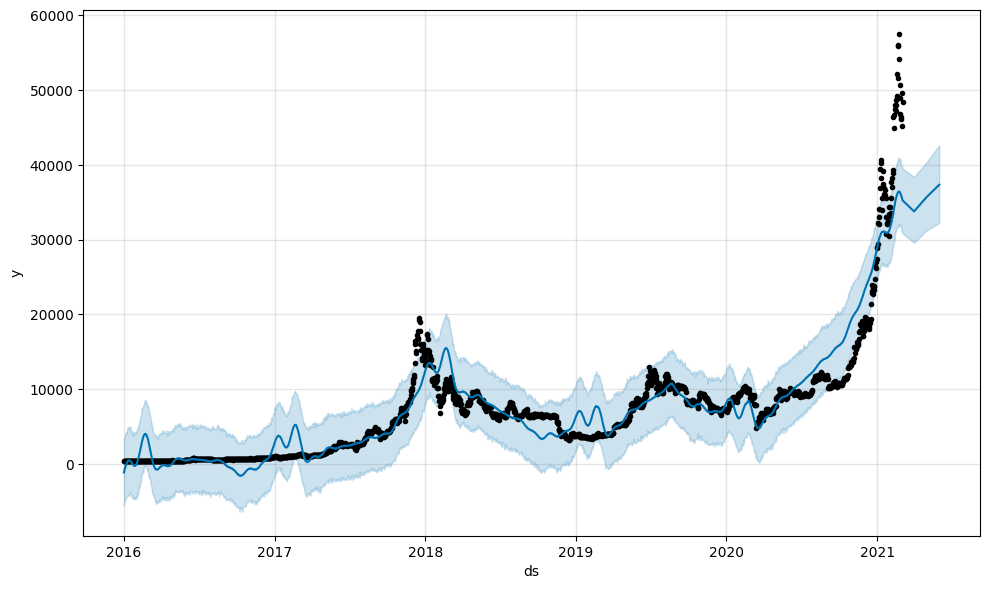

In [ ]:
monthly_model.plot(monthly_predictions, uncertainty = True)

pyplot.show()

In [ ]:
#PREDICT WEEKLY TREND

weekly_model = Prophet(interval_width = INTERVAL_WIDTH,
                        weekly_seasonality = True )

weekly_model.fit(dataframe)

NUMBER_OF_PERIODS = 12  # 12 weeks

future_weekly_dataframe = weekly_model.make_future_dataframe(periods = NUMBER_OF_PERIODS,
                                                               freq = "W" )

weekly_predictions = weekly_model.predict(future_weekly_dataframe)

weekly_predictions

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqoq5dgm/15ydgw04.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqoq5dgm/we50whiv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28424', 'data', 'file=/tmp/tmpzqoq5dgm/15ydgw04.json', 'init=/tmp/tmpzqoq5dgm/we50whiv.json', 'output', 'file=/tmp/tmpzqoq5dgm/prophet_modelvxe_5buv/prophet_model-20240427104343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:43:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:43:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,-3907.012936,-5817.272082,3359.185949,-3907.012936,-3907.012936,2767.866329,2767.866329,2767.866329,-26.465467,-26.465467,-26.465467,2794.331797,2794.331797,2794.331797,0.0,0.0,0.0,-1139.146607
1,2016-01-02,-3875.881494,-5275.538152,3323.160954,-3875.881494,-3875.881494,2997.999956,2997.999956,2997.999956,19.335853,19.335853,19.335853,2978.664104,2978.664104,2978.664104,0.0,0.0,0.0,-877.881538
2,2016-01-03,-3844.750052,-5089.462841,3594.851056,-3844.750052,-3844.750052,3169.378293,3169.378293,3169.378293,14.822599,14.822599,14.822599,3154.555694,3154.555694,3154.555694,0.0,0.0,0.0,-675.371759
3,2016-01-04,-3813.618610,-4605.462588,3699.805483,-3813.618610,-3813.618610,3308.767587,3308.767587,3308.767587,-10.637109,-10.637109,-10.637109,3319.404696,3319.404696,3319.404696,0.0,0.0,0.0,-504.851022
4,2016-01-05,-3782.487168,-5076.562487,4300.467550,-3782.487168,-3782.487168,3495.189905,3495.189905,3495.189905,24.457451,24.457451,24.457451,3470.732453,3470.732453,3470.732453,0.0,0.0,0.0,-287.297263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,2021-04-25,34890.708244,30702.221801,39696.014540,33466.539312,36241.010748,260.962820,260.962820,260.962820,14.822599,14.822599,14.822599,246.140221,246.140221,246.140221,0.0,0.0,0.0,35151.671064
1897,2021-05-02,35427.645286,31018.723173,40764.105232,33674.360804,37021.829705,497.857148,497.857148,497.857148,14.822599,14.822599,14.822599,483.034548,483.034548,483.034548,0.0,0.0,0.0,35925.502433
1898,2021-05-09,35964.582327,31936.379232,41143.828850,33942.789270,37877.539979,628.019861,628.019861,628.019861,14.822599,14.822599,14.822599,613.197261,613.197261,613.197261,0.0,0.0,0.0,36592.602188
1899,2021-05-16,36501.519368,32080.503172,41840.821288,34141.442516,38766.057824,424.626512,424.626512,424.626512,14.822599,14.822599,14.822599,409.803913,409.803913,409.803913,0.0,0.0,0.0,36926.145880


In [ ]:
prediction_12_week = weekly_predictions[["yhat"]].iloc[[-1]]

prediction_12_week

,yhat
1900,37068.892848


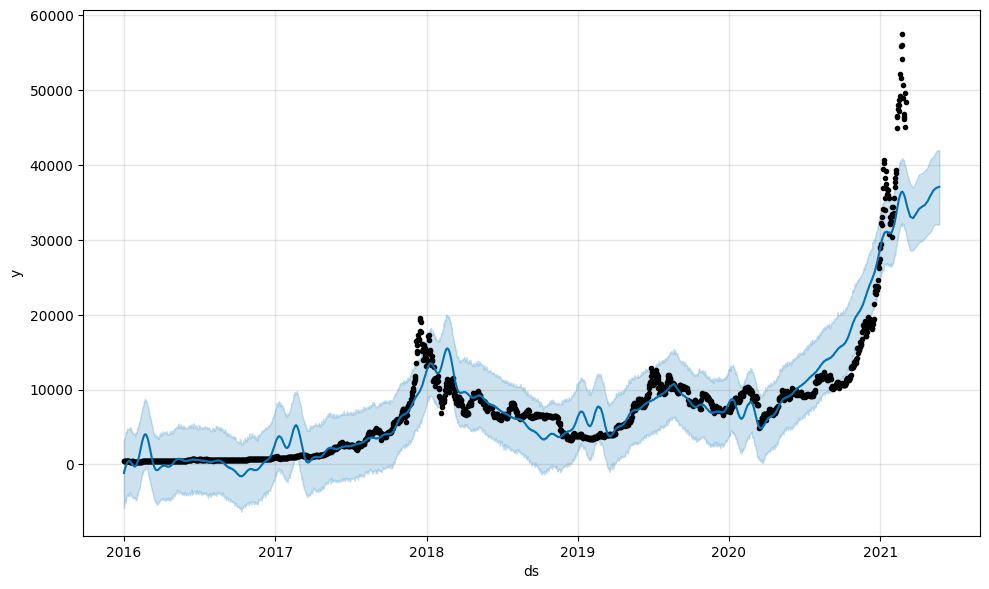

In [ ]:
weekly_model.plot(weekly_predictions, uncertainty = True)

pyplot.show()

In [ ]:
#COMPARISONS BETWEEN THE THREE MODELS

print(prediction_100_days)   # it is actually 90

              yhat
1978  38006.957347


In [ ]:
print(prediction_3_month)

              yhat
1891  37324.108254


In [ ]:
print(prediction_12_week)

              yhat
1900  37068.892848
